In [1]:
import sys
# sys.path
# sys.path[5] = "C:\\ProgramData\\Anaconda3\\envs\\geoplot\\Lib\\site-packages"

import matplotlib.path as mpath
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
# import cartopy.crs as ccrs 
# import cartopy.feature as cfeature
import geopandas as gpd
from osgeo import gdal
import pandas as pd
# import xarray as xr
# import rioxarray
# from easy_mpl import taylor_plot
from matplotlib.patches import Patch
import matplotlib.ticker as ticker
# import rasterio
#PlateCarree EqualEarth()

In [2]:
def get_geotiff_data(path):
    """
    get gdal raster data
    """
    ds = gdal.Open(path)
    gt = ds.GetGeoTransform()
    array = ds.ReadAsArray()
    array = array[:1501, :]
    
    xsize = ds.RasterXSize
    ysize = ds.RasterYSize
    
    xres, yres = gt[1], gt[5]
    xcor, ycor = gt[0], gt[3]
    
    lat = np.arange(ycor+0.5*yres, ycor+0.5*yres + yres*ysize, yres)[:1501]
    lon = np.arange(xcor+0.5*xres, xcor+0.5*xres + xres*xsize, xres)
    return lon, lat, array

In [3]:
def draw_hist(ax, array, bins, ran, cmap):
    input_array = array.reshape(-1)

    N, bins, patches = ax.hist(input_array, bins=bins, range=ran, edgecolor='black', density=True, linewidth=0.2)
    
    # ax.axes.xaxis.set_ticks([])
    # ax.axes.yaxis.set_ticks([]) 
    
    # ax.set_xticks([0, 0.25, 0.5, 0.75, 1], ["100%", "population", "Equal", "Probability", "100%"], rotation=90, fontsize=4)
    ax.set_facecolor("none")
    ax.spines['top'].set_visible(False)  
    ax.spines['right'].set_visible(False)  
    # ax.spines['left'].set_visible(False)
    ax.spines["bottom"].set_linewidth("0.5")
    ax.spines["left"].set_linewidth("0.5")
    ax.margins(0, 0)
    ax.tick_params("x",which="major",
               length=2,width = 0.2,
               colors = "0.25")

    
    
    ax.tick_params("y",which="major",
               length=2,width = 0.2,
               colors = "0.25")
    formatter = ticker.FormatStrFormatter("%1.2f")
    ax.yaxis.set_major_formatter(formatter)
    
    # formatter = ticker.FormatStrFormatter("%1.1f")
    # ax.yaxis.set_major_formatter(formatter)
    
    cm = plt.get_cmap(cmap)
    for i in range(len(patches)):
        color = cm(1.*i/len(patches))  
        patches[i].set_facecolor(color)
    ax.tick_params("x",which="major",
               length=1.34,width = 0.8,
               colors = "0.25", pad=-0.01, labelsize=5)
    ax.tick_params("y",which="major",
                   length=1.34,width = 0.8,
                   colors = "0.25", pad=-0.01, labelsize=5)

In [4]:
def draw_lat_plot(ax, lat, data):
    
    
    x = lat
    a = data.copy()

    zeros = np.zeros(x.shape)
    a = np.ma.masked_array(a,mask=(np.isnan(a)))

    
    mean_value = a.mean(axis=1)[::-1]
    y1 = mean_value.copy()
    y1[y1<0] = 0
    y2 = mean_value.copy()
    y2[y2>0] = 0
    ax.fill_betweenx(x, y1, color="#58B0A7", linewidth=0)
    ax.fill_betweenx(x, y2, color="#CFA256", linewidth=0)
    ax.margins(0, 0)
    # ax.set_xlim(0)
    ax.plot([0, 0], [-90, 90], linewidth=0.5, color="orange", linestyle="--")
    ax.set_ylim(-60, 85)
    # ax.set_axisbelow(False)
    ax.set_xlabel("Anomaly")
    ax.set_ylabel("Latitude", labelpad=-1)
    ax.set_yticks(np.arange(-40, 80.01, 20))
    
    ax.spines["bottom"].set_linewidth(0.3)
    ax.spines["top"].set_linewidth(0.3)
    ax.spines["left"].set_linewidth(0.3)
    ax.spines["right"].set_linewidth(0.3)
    
    ax.tick_params("x",which="major",
               length=1.34,width = 0.8,
               colors = "0.25", pad=-0.01, labelsize=5)
    ax.tick_params("y",which="major",
                   length=1.34,width = 0.8,
                   colors = "0.25", pad=-0.01, labelsize=5)
    ax.tick_params(which = "minor",
                   length = 1.34, width = 0.8,
                   labelsize=4,labelcolor = "0.25")

In [5]:
def draw(ax1, title, lon, lat, array, vmin, vmax, levels, ticks_label, cmap, number, c_list=None, p_value=None):
    ax1.outline_patch.set_linewidth(0.3)
    #设置颜色属性
    norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
    # array = array.astype(np.float32)
    # array[array==255] = np.nan
    if c_list is not None:
        cs = ax1.contourf(lon, lat, array, transform=ccrs.PlateCarree(), colors=c_list,levels=levels, norm=norm, shading='nearest', extend="both")
    else:
        cs = ax1.contourf(lon, lat, array, transform=ccrs.PlateCarree(), cmap=cmap,levels=levels, norm=norm, shading='nearest', extend="both")
    cbar = fig.colorbar(cs, orientation='horizontal', ticks=ticks_label, pad=0.02, shrink=0.8, fraction=0.03, aspect=50)

    if p_value is not None:
        # significance
        p = p_value.plot.contourf(ax=ax1,transform=ccrs.PlateCarree(),levels=2, vmin=-1, vmax=0.2,  
                                  hatches=[None, 'xxxxxxxxxxxxxxxxxxx'],colors="none",add_colorbar=False,
                                  zorder=3)

    ax1.set_title(title, fontsize=6)
    # # ax1.set_title(title, fontsize='medium')
    # #修改刻度线长短
    cbar.ax.tick_params(size=1, labelsize=5)
    cbar.outline.set_linewidth(0.2)
    # ax1.add_feature(cfeature.BORDERS, linewidth=0.15)
    # ax1.set_global()
    # ax1.add_feature(cfeature.LAND.with_scale('110m'))
    ax1.coastlines(linewidth=0.2)

    # a = ax1.gridlines(draw_labels=True, linewidth=0.2)
    ax1.set_extent([-179.9999, 179.9999, -60, 90],ccrs.PlateCarree())
    # ax1.set_ylim(-60, 90)
    # a.top_labels = False
    # fix_extent(ax1, (-180, 180, -60, 90))

    # if number != "(d)":
    #     ax1.text(
    #     -0.03, 0.95, number,
    #     fontsize=8,
    #     fontweight="bold",
    #     transform = ax1.transAxes
    #     )
    # else:
    ax1.text(
        0.0, 0.95, number,
        fontsize=8,
        fontweight="bold",
        transform = ax1.transAxes
    )

In [6]:
from matplotlib.colors import ListedColormap,LinearSegmentedColormap
# clist = ["#fcde9c", "#faa476", "#f0746e", "#e34f6f", "#dc3977", "#b9257a", "#7c1d6f"]#sunset dark
# clist = ["#57E2D4", "#60D2AD", "#80C48B", "#9FB669", "#BFA845", "#DE9B24", "#FE8D02", "#FF7515", "#FF5E2A", "#FF473F", "#FF3053", "#FF1869", "#FF027F"]
# clist1 = ["#57E1D4", "#fcde9c", "#faa476", "#f0746e", "#e34f6f", "#dc3977", "#b9257a", "#7c1d6f"]
# clist2 = ["#fcde9c","#faa476","#f0746e","#e34f6f","#dc3977","#b9257a","#7c1d6f"]
# clist = ["#264653", "#2a9d8f", "#e9c46a", "#f4a261", "#e76f51"] 
# clist2 = ["#f4f1de", "#e07a5f", "#3d405b", "#81b29a", "#f2cc8f"]
# clist4 = ["#8CD2C7", "#FEFFB3", "#BEB9D9", "#F7A83C", "#FB8271"]
sunset = ["#f3e79b", "#fac484", "#f8a07e", "#eb7f86", "#ce6693", "#a059a0", "#5c53a5"]
# clist4 = ["#fff7ec", "#fee8c8", "#fdd49e", "#fdbb84", "#fc8d59", "#ef6548", "#d7301f", "#990000"]
# newcmap = LinearSegmentedColormap.from_list('chaos',clist4)
num_colors = 7
cs = ["#EAEAEA"]
# colors = [newcmap(i / (num_colors-1)) for i in range(num_colors)]
# hex_colors = ['#%02x%02x%02x' % (int(color[0] * 255), int(color[1] * 255), int(color[2] * 255)) for color in colors]

clist4 = cs + sunset
newcmap = LinearSegmentedColormap.from_list('chaos',clist4)

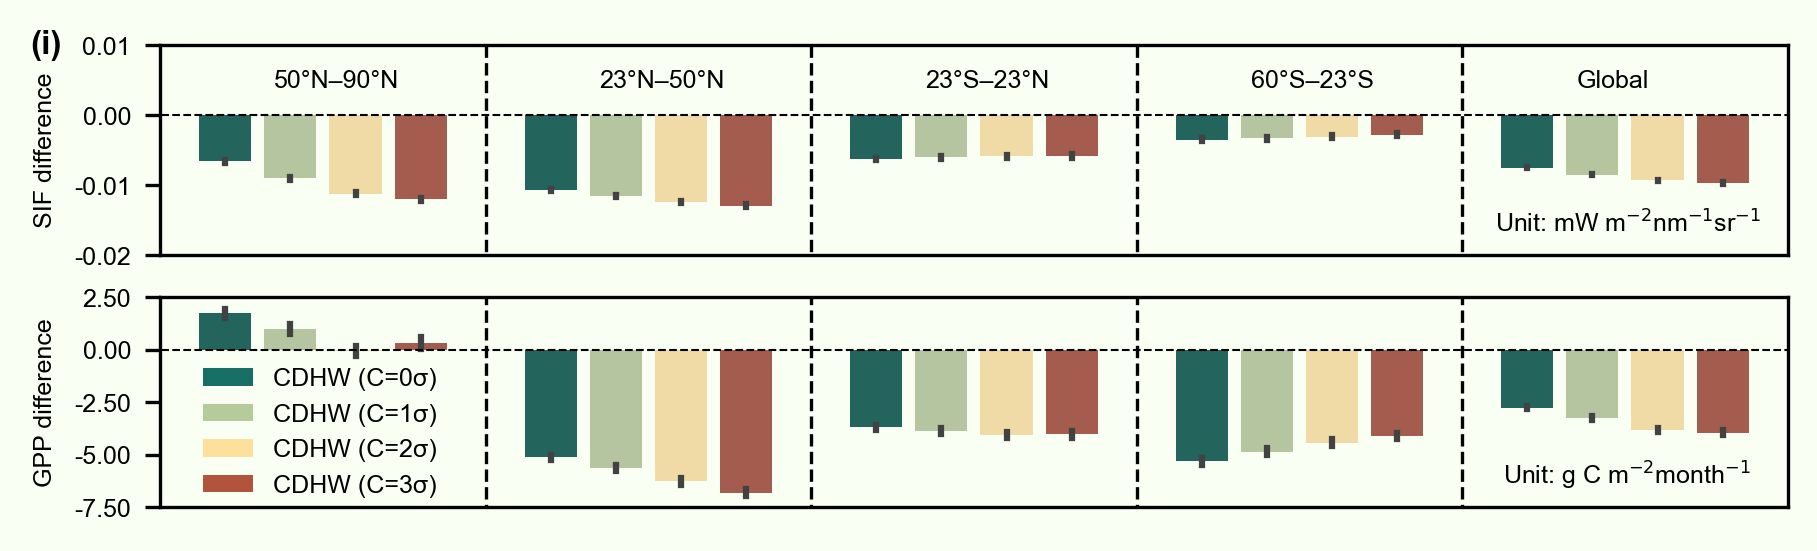

In [10]:
import seaborn as sb
from matplotlib.colors import BoundaryNorm
import matplotlib.ticker as ticker
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
mpl.rcParams['hatch.linewidth'] = 0.2
plt.rcParams["font.sans-serif"] = "Arial"
# plt.rcParams["font.weight"] = "bold"
# plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams.update({"font.size":6})
fig = plt.figure(figsize=(7,2), dpi=300)
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)
# SIF data
sif_global_0sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_eco_differences_reproj\sif_0sigma_diff.tif.tif")[2].reshape(-1)
sif_global_1sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_eco_differences_reproj\sif_1sigma_diff.tif.tif")[2].reshape(-1)
sif_global_2sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_eco_differences_reproj\sif_2sigma_diff.tif.tif")[2].reshape(-1)
sif_global_3sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_eco_differences_reproj\sif_3sigma_diff.tif.tif")[2].reshape(-1)

sif_bot_0sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_eco_difference_reproj_subregions\-60,-23_sif_0sigma_diff.tif.tif")[2].reshape(-1)
sif_bot_1sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_eco_difference_reproj_subregions\-60,-23_sif_1sigma_diff.tif.tif")[2].reshape(-1)
sif_bot_2sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_eco_difference_reproj_subregions\-60,-23_sif_2sigma_diff.tif.tif")[2].reshape(-1)
sif_bot_3sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_eco_difference_reproj_subregions\-60,-23_sif_3sigma_diff.tif.tif")[2].reshape(-1)

sif_botmid_0sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_eco_difference_reproj_subregions\-23,23_sif_0sigma_diff.tif.tif")[2].reshape(-1)
sif_botmid_1sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_eco_difference_reproj_subregions\-23,23_sif_1sigma_diff.tif.tif")[2].reshape(-1)
sif_botmid_2sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_eco_difference_reproj_subregions\-23,23_sif_2sigma_diff.tif.tif")[2].reshape(-1)
sif_botmid_3sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_eco_difference_reproj_subregions\-23,23_sif_3sigma_diff.tif.tif")[2].reshape(-1)

sif_topmid_0sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_eco_difference_reproj_subregions\23,50_sif_0sigma_diff.tif.tif")[2].reshape(-1)
sif_topmid_1sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_eco_difference_reproj_subregions\23,50_sif_1sigma_diff.tif.tif")[2].reshape(-1)
sif_topmid_2sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_eco_difference_reproj_subregions\23,50_sif_2sigma_diff.tif.tif")[2].reshape(-1)
sif_topmid_3sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_eco_difference_reproj_subregions\23,50_sif_3sigma_diff.tif.tif")[2].reshape(-1)

sif_top_0sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_eco_difference_reproj_subregions\50,90_sif_0sigma_diff.tif.tif")[2].reshape(-1)
sif_top_1sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_eco_difference_reproj_subregions\50,90_sif_1sigma_diff.tif.tif")[2].reshape(-1)
sif_top_2sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_eco_difference_reproj_subregions\50,90_sif_2sigma_diff.tif.tif")[2].reshape(-1)
sif_top_3sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_eco_difference_reproj_subregions\50,90_sif_3sigma_diff.tif.tif")[2].reshape(-1)

# GPP data
gpp_global_0sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_eco_differences_reproj\gpp_0sigma_diff.tif.tif")[2].reshape(-1)
gpp_global_1sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_eco_differences_reproj\gpp_1sigma_diff.tif.tif")[2].reshape(-1)
gpp_global_2sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_eco_differences_reproj\gpp_2sigma_diff.tif.tif")[2].reshape(-1)
gpp_global_3sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_eco_differences_reproj\gpp_3sigma_diff.tif.tif")[2].reshape(-1)

gpp_bot_0sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_eco_difference_reproj_subregions\-60,-23_gpp_0sigma_diff.tif.tif")[2].reshape(-1)
gpp_bot_1sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_eco_difference_reproj_subregions\-60,-23_gpp_1sigma_diff.tif.tif")[2].reshape(-1)
gpp_bot_2sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_eco_difference_reproj_subregions\-60,-23_gpp_2sigma_diff.tif.tif")[2].reshape(-1)
gpp_bot_3sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_eco_difference_reproj_subregions\-60,-23_gpp_3sigma_diff.tif.tif")[2].reshape(-1)

gpp_botmid_0sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_eco_difference_reproj_subregions\-23,23_gpp_0sigma_diff.tif.tif")[2].reshape(-1)
gpp_botmid_1sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_eco_difference_reproj_subregions\-23,23_gpp_1sigma_diff.tif.tif")[2].reshape(-1)
gpp_botmid_2sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_eco_difference_reproj_subregions\-23,23_gpp_2sigma_diff.tif.tif")[2].reshape(-1)
gpp_botmid_3sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_eco_difference_reproj_subregions\-23,23_gpp_3sigma_diff.tif.tif")[2].reshape(-1)

gpp_topmid_0sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_eco_difference_reproj_subregions\23,50_gpp_0sigma_diff.tif.tif")[2].reshape(-1)
gpp_topmid_1sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_eco_difference_reproj_subregions\23,50_gpp_1sigma_diff.tif.tif")[2].reshape(-1)
gpp_topmid_2sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_eco_difference_reproj_subregions\23,50_gpp_2sigma_diff.tif.tif")[2].reshape(-1)
gpp_topmid_3sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_eco_difference_reproj_subregions\23,50_gpp_3sigma_diff.tif.tif")[2].reshape(-1)

gpp_top_0sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_eco_difference_reproj_subregions\50,90_gpp_0sigma_diff.tif.tif")[2].reshape(-1)
gpp_top_1sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_eco_difference_reproj_subregions\50,90_gpp_1sigma_diff.tif.tif")[2].reshape(-1)
gpp_top_2sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_eco_difference_reproj_subregions\50,90_gpp_2sigma_diff.tif.tif")[2].reshape(-1)
gpp_top_3sigma = get_geotiff_data(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\anomalies\ERA5_eco_difference_reproj_subregions\50,90_gpp_3sigma_diff.tif.tif")[2].reshape(-1)

import matplotlib.pyplot as plt
import numpy as np

sif_global =[sif_global_0sigma[~np.isnan(sif_global_0sigma)], sif_global_1sigma[~np.isnan(sif_global_1sigma)], sif_global_2sigma[~np.isnan(sif_global_2sigma)], sif_global_3sigma[~np.isnan(sif_global_3sigma)]]
sif_top =[sif_top_0sigma[~np.isnan(sif_top_0sigma)], sif_top_1sigma[~np.isnan(sif_top_1sigma)], sif_top_2sigma[~np.isnan(sif_top_2sigma)], sif_top_3sigma[~np.isnan(sif_top_3sigma)]]
sif_topmid =[sif_topmid_0sigma[~np.isnan(sif_topmid_0sigma)], sif_topmid_1sigma[~np.isnan(sif_topmid_1sigma)], sif_topmid_2sigma[~np.isnan(sif_topmid_2sigma)], sif_topmid_3sigma[~np.isnan(sif_topmid_3sigma)]]
sif_botmid =[sif_botmid_0sigma[~np.isnan(sif_botmid_0sigma)], sif_botmid_1sigma[~np.isnan(sif_botmid_1sigma)], sif_botmid_2sigma[~np.isnan(sif_botmid_2sigma)], sif_botmid_3sigma[~np.isnan(sif_botmid_3sigma)]]
sif_bot =[sif_bot_0sigma[~np.isnan(sif_bot_0sigma)], sif_bot_1sigma[~np.isnan(sif_bot_1sigma)], sif_bot_2sigma[~np.isnan(sif_bot_2sigma)], sif_bot_3sigma[~np.isnan(sif_bot_3sigma)]]

data1 = [[]]+sif_top +[[]]+ sif_topmid + [[]]+sif_botmid + [[]]+sif_bot +[[]]+ sif_global
#首先有图（fig），然后有轴（ax）
colors = ["k", '#186F65', '#B5CB99', '#FCE09B', "#B2533E", "k", '#186F65', '#B5CB99', '#FCE09B', "#B2533E", "k", '#186F65', '#B5CB99', '#FCE09B', "#B2533E", "k", '#186F65', '#B5CB99', '#FCE09B', "#B2533E", "k", '#186F65', '#B5CB99', '#FCE09B', "#B2533E"]


sb.barplot(data = data1, errorbar=("ci", 95), linewidth=2.5, edgecolor=None, palette=colors, errwidth=1.5, ax=ax1)

gpp_global =[gpp_global_0sigma[~np.isnan(gpp_global_0sigma)], gpp_global_1sigma[~np.isnan(gpp_global_1sigma)], gpp_global_2sigma[~np.isnan(gpp_global_2sigma)], gpp_global_3sigma[~np.isnan(gpp_global_3sigma)]]
gpp_top =[gpp_top_0sigma[~np.isnan(gpp_top_0sigma)], gpp_top_1sigma[~np.isnan(gpp_top_1sigma)], gpp_top_2sigma[~np.isnan(gpp_top_2sigma)], gpp_top_3sigma[~np.isnan(gpp_top_3sigma)]]
gpp_topmid =[gpp_topmid_0sigma[~np.isnan(gpp_topmid_0sigma)], gpp_topmid_1sigma[~np.isnan(gpp_topmid_1sigma)], gpp_topmid_2sigma[~np.isnan(gpp_topmid_2sigma)], gpp_topmid_3sigma[~np.isnan(gpp_topmid_3sigma)]]
gpp_botmid =[gpp_botmid_0sigma[~np.isnan(gpp_botmid_0sigma)], gpp_botmid_1sigma[~np.isnan(gpp_botmid_1sigma)], gpp_botmid_2sigma[~np.isnan(gpp_botmid_2sigma)], gpp_botmid_3sigma[~np.isnan(gpp_botmid_3sigma)]]
gpp_bot =[gpp_bot_0sigma[~np.isnan(gpp_bot_0sigma)], gpp_bot_1sigma[~np.isnan(gpp_bot_1sigma)], gpp_bot_2sigma[~np.isnan(gpp_bot_2sigma)], gpp_bot_3sigma[~np.isnan(gpp_bot_3sigma)]]

data2 = [[]]+gpp_top +[[]]+ gpp_topmid +[[]]+ gpp_botmid +[[]]+ gpp_bot +[[]]+ gpp_global

sb.barplot(data = data2, errorbar=("ci", 95), linewidth=1.5, edgecolor=None, palette=colors, errwidth=1.5, ax=ax2)

ax1.hlines(0,-1,25,color="k", linewidth=0.5, linestyle="--")
ax2.hlines(0,-1,25,color="k", linewidth=0.5, linestyle="--")
ax1.set_xlim(0, 25)
ax2.set_xlim(0, 25)
ax1.set_ylim(-0.02, 0.01)
ax2.set_ylim(-7.50, 2.50)

ax1.vlines(5,-10,10,color="k", linewidth=0.8, linestyle="--")
ax1.vlines(10,-10,10,color="k", linewidth=0.8, linestyle="--")
ax1.vlines(15,-10,10,color="k", linewidth=0.8, linestyle="--")
ax1.vlines(20,-10,10,color="k", linewidth=0.8, linestyle="--")

ax2.vlines(5,-10,10,color="k", linewidth=0.8, linestyle="--")
ax2.vlines(10,-10,10,color="k", linewidth=0.8, linestyle="--")
ax2.vlines(15,-10,10,color="k", linewidth=0.8, linestyle="--")
ax2.vlines(20,-10,10,color="k", linewidth=0.8, linestyle="--")

ax1.set_xticks([])
ax1.set_ylabel("SIF difference")
ax2.set_ylabel("GPP difference")
ax2.set_xticks([])

formatter = ticker.FormatStrFormatter("%1.2f")
ax2.yaxis.set_major_formatter(formatter)
formatter = ticker.FormatStrFormatter("%1.2f")
ax1.yaxis.set_major_formatter(formatter)

ax1.text(
        0.67, 0.8, "60°S–23°S", 
        fontsize=6,
        transform = ax1.transAxes
    )
ax1.text(
        0.47, 0.8, "23°S–23°N",
        fontsize=6,
        transform = ax1.transAxes
    )
ax1.text(
        0.27, 0.8, "23°N–50°N",
        fontsize=6,
        transform = ax1.transAxes
    )
ax1.text(
        0.07, 0.8, "50°N–90°N",
        fontsize=6,
        transform = ax1.transAxes
    )
ax1.text(
        0.87, 0.8, "Global",
        fontsize=6,
        transform = ax1.transAxes
    )
ax1.text(
        0.82, 0.11, "Unit: mW m$^{-2}$nm$^{-1}$sr$^{-1}$",
        fontsize=6,
        transform = ax1.transAxes
    )
ax2.text(
        0.825, 0.11, "Unit: g C m$^{-2} $month$^{-1}$",
        fontsize=6,
        transform = ax2.transAxes
    )


# '#186F65', '#B5CB99', '#FCE09B', "#B2533E"
legend_elements = [Patch(facecolor='#186F65', edgecolor=None,
                         label='CDHW (C=0σ)'),
                  Patch(facecolor='#B5CB99', edgecolor=None,
                         label='CDHW (C=1σ)'),
                  Patch(facecolor='#FCE09B', edgecolor=None,
                         label='CDHW (C=2σ)'),
                  Patch(facecolor="#B2533E", edgecolor=None,
                         label='CDHW (C=3σ)')]

# Create the figure
ax2.legend(handles=legend_elements, loc=(0.02, 0), frameon=False)
ax1.text(
        -0.08, 0.96, "(i)",
        fontsize=8,
        fontweight="bold",
        transform = ax1.transAxes
    )
fig.patch.set_facecolor('#F9FFF3')
ax1.set_facecolor('#F9FFF3')
ax2.set_facecolor('#F9FFF3')
plt.savefig(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\figs\GPP_SIF_diff_era5.jpg", bbox_inches="tight", dpi=300)